In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from keras.layers.core import Dropout, Activation, Dense, Flatten

In [151]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [152]:
x_train[0].shape

(28, 28)

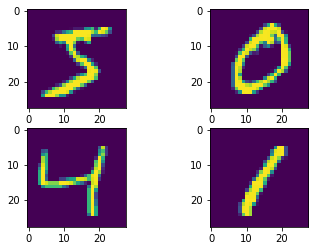

array([5, 0, 4, 1], dtype=uint8)

In [153]:
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(x_train[i])
    
plt.show()
y_train[:4]

In [154]:
x_train.shape, x_test.shape,    y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

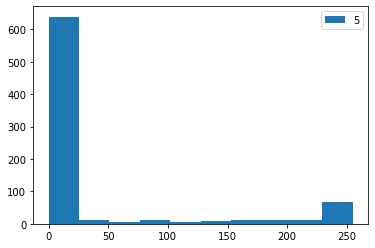

In [155]:
x_train_reshaped = x_train.reshape(60000, 784)
x_test_reshaped = x_test.reshape(10000, 784)

plt.hist(x_train_reshaped[0], label = '5')
plt.legend(loc = 'best')

In [156]:
s = pd.Series(y_train)
s.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [157]:
#defining model
model = Sequential()
model.add(Dense(784))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [158]:
model.fit(x_train_reshaped, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.7461 - accuracy: 0.5612
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7414 - accuracy: 0.7937
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4249 - accuracy: 0.8911
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2736 - accuracy: 0.9362
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1794 - accuracy: 0.9575
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1394 - accuracy: 0.9656
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1155 - accuracy: 0.9721
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1034 - accuracy: 0.9752
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0944 - accuracy: 0.9780
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

In [159]:
y_predict = model.predict(x_test_reshaped)
y_predicted = [np.argmax(element) for element in y_predict]

In [160]:
#checking accuracy

accuracy = accuracy_score(y_predicted, y_test)
accuracy

0.9691

In [161]:
#further analysis with confusion matrix
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    2,    1,    0,    0,    1,    5,    1,    7,    2],
       [   0, 1129,    0,    0,    0,    0,    2,    0,    4,    0],
       [   1,   10,  998,    1,    3,    0,    1,    9,    9,    0],
       [   0,    2,    4,  968,    0,   11,    0,    5,   18,    2],
       [   0,    3,    0,    0,  965,    0,    8,    0,    3,    3],
       [   2,    0,    0,    4,    1,  863,    4,    2,   13,    3],
       [   3,    4,    0,    0,    1,    6,  938,    0,    6,    0],
       [   0,   24,    3,    2,    0,    1,    0,  979,   15,    4],
       [   1,   12,    2,    0,    0,    1,    0,    3,  955,    0],
       [   1,    5,    0,    3,   32,    6,    1,    6,   20,  935]])>

Text(33.0, 0.5, 'Truth')

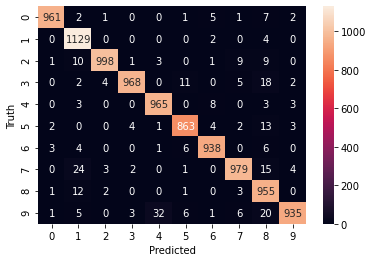

In [162]:
import seaborn as sns
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#here you can see its predicted 0 as 0 about 968 times...

In [163]:
#Trying with sigmoid function with new model
model = Sequential()
model.add(Dense(784))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [164]:
model.fit(x_train_reshaped,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 8ms/step - loss: 0.4341 - accuracy: 0.8934
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2652 - accuracy: 0.9207
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2309 - accuracy: 0.9292
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2189 - accuracy: 0.9337
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2008 - accuracy: 0.9382
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1979 - accuracy: 0.9397
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1915 - accuracy: 0.9408
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1804 - accuracy: 0.9441
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1793 - accuracy: 0.9451
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - l

In [165]:
y_predict = model.predict(x_test_reshaped)
y_predicted = [np.argmax(element) for element in y_predict]

In [166]:
sigmoid_accuracy = accuracy_score(y_predicted, y_test)
sigmoid_accuracy

0.9494

In [168]:
#conclusion
print('Accuracy with relu :', accuracy)
print('Accuracy with sigmoid :', sigmoid_accuracy)
#so relu function is best fitted here

Accuracy with relu : 0.9691
Accuracy with sigmoid : 0.9494
